In [31]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

print('Done importing.')

Done importing.


In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Data loaded.')

Data loaded.


5


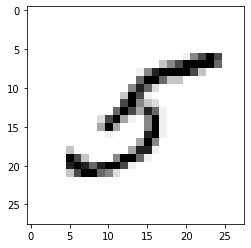

In [33]:
index = 35
print(y_train[index])
plt.imshow(x_train[index], cmap='Greys')
plt.show()

In [34]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [36]:
img_rows, img_cols = 28, 28
x_train, x_test = x_train.reshape((x_train.shape[0], img_cols, img_rows, 1)), x_test.reshape((x_test.shape[0], img_cols, img_rows, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
num_classes = 10
if y_train.shape[-1] != 10 or y_test.shape[-1] != 10:
  y_train, y_test = to_categorical(y_train), to_categorical(y_test)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [41]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [40]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2453 - accuracy: 0.9246 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0852 - accuracy: 0.9751 - val_loss: 0.0392 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0342 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0341 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0308 - val_accuracy: 0.9907
Epoch 